# Synchronization

Install the library with 
```
pip install kuramoto
````

to install the package by Damicelli Fabrizio  
https://github.com/fabridamicelli/kuramoto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sb

from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

sb.set_theme(style="ticks")

## Kuramoto model

In [2]:
# Generate a random graph and transform into an adjacency matrix
N = 100
p = 0.2
graph_nx = nx.erdos_renyi_graph(N, p)
graph = nx.to_numpy_array(graph_nx)

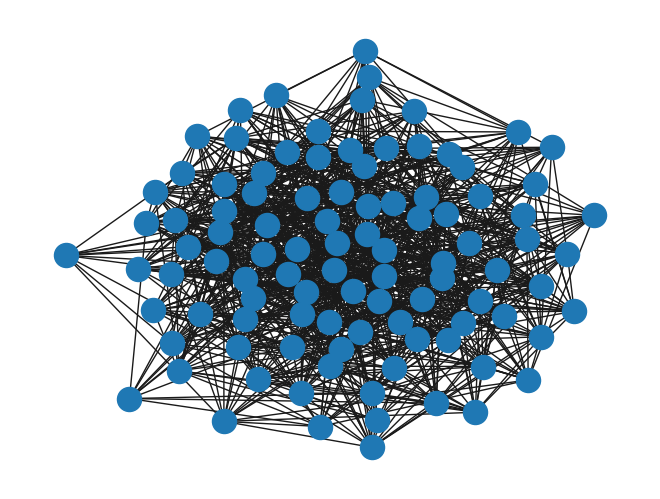

In [3]:
nx.draw(graph_nx)

The more the frequencies are spread out, the more difficult it is to sync.  
The stonger the coupling is, the easier it is to sync.  
Play with the parameter values!

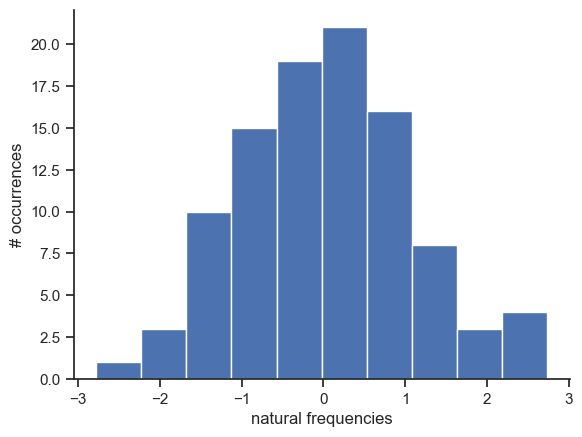

In [4]:
# we set the natural frequencies
omega = np.random.normal(loc=0, scale=1, size=N)

# and visualize them
fig, ax = plt.subplots()

ax.hist(omega)

ax.set_ylabel("# occurrences")
ax.set_xlabel("natural frequencies")

sb.despine()

In [5]:
# Instantiate model with parameters
K = 2
dt = 0.01
T = 200
model = Kuramoto(coupling=K, dt=dt, T=T, n_nodes=N, natfreqs=omega)

# Run simulation - output is time series for all nodes (node vs time)
phases = model.run(adj_mat=graph)

In [6]:
phases.shape

(100, 20000)

In [7]:
# plot_activity(phases)
# sb.despine()

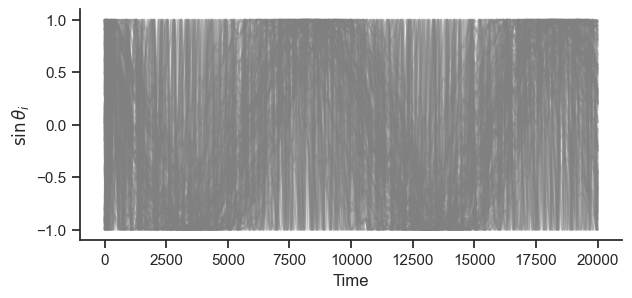

In [8]:
fig, ax = plt.subplots(figsize=(7, 3))

ax.plot(np.sin(phases.T), color="grey", alpha=0.3)

ax.set_ylabel(r"$\sin \theta_i$")
ax.set_xlabel("Time")

sb.despine()

plt.show()

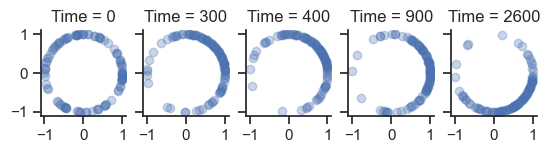

In [9]:
times = [0, 300, 400, 900, 2600]


fig, axes = plt.subplots(1, len(times), sharey=True, sharex=True)


for ax, time in zip(axes, times):
    ax.set_aspect("equal")
    ax.plot(np.cos(phases[:, time]), np.sin(phases[:, time]), "o", alpha=0.3)
    ax.set_title(f"Time = {time}")

sb.despine()

In [10]:
# plot_phase_coherence(phases)

In [11]:
def order_parameter(phases):
    """Returns the order parameter of the oscillators over time"""
    R = np.sum(np.exp(1j * phases), axis=0) / N
    return np.abs(R)

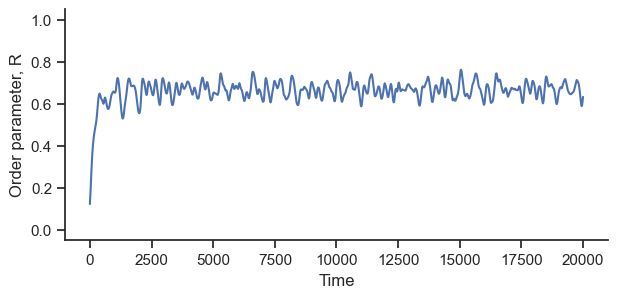

In [12]:
fig, ax = plt.subplots(figsize=(7, 3))

R = order_parameter(phases)

ax.plot(R)

ax.set_ylabel("Order parameter, R")
ax.set_xlabel("Time")

ax.set_ylim([-0.05, 1.05])

sb.despine()

## Onset of sync: phase transition

In [13]:
Ks = np.arange(0, 6, 0.2)

dt = 0.01
T = 200

t_transient = int(50 / dt)

order_avg = np.zeros((len(Ks)))

for i, K in enumerate(Ks):

    model = Kuramoto(coupling=K, dt=dt, T=T, n_nodes=N, natfreqs=omega)

    phases = model.run(adj_mat=graph)

    phases_stationary = phases[:, t_transient:]

    R = order_parameter(phases_stationary).mean()

    order_avg[i] = R

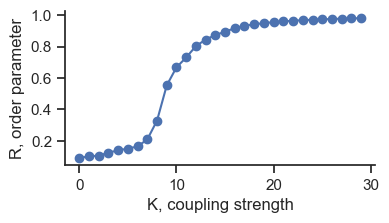

In [14]:
fig, ax = plt.subplots(figsize=(4, 2))

ax.plot(order_avg, "o-")

ax.set_ylabel("R, order parameter")
ax.set_xlabel("K, coupling strength")

sb.despine()

In [ ]:
# Instantiate model with parameters
Ks = np.arange(0, 6, 0.1)
dt = 0.01
T = 200

t_transient = int(50 / dt)

order_avg = np.zeros(len(Ks))

for i, K in enumerate(Ks):
    # instantiate model
    model = Kuramoto(coupling=K, dt=dt, T=T, n_nodes=len(graph), natfreqs=omega)

    # Run simulation - output is time series for all nodes (node vs time)
    phases = model.run(adj_mat=graph)

    phases_stationary = phases[:, t_transient:]

    order_avg[i] = order_parameter(phases_stationary).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3.5))

ax.plot(Ks, order_avg, "o-")

ax.set_ylabel("R, order parameter")
ax.set_xlabel("K, coupling strength")
sb.despine()